<a href="https://colab.research.google.com/github/harshv47/Flipr_Hack_submission/blob/master/Flipr_Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import os


In [180]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
train_df = pd.read_excel('/content/drive/My Drive/Dataset/Flipr/Train_dataset.xlsx')
test_df = pd.read_excel('/content/drive/My Drive/Dataset/Flipr/Test_dataset.xlsx')
var_des_df = pd.read_excel('/content/drive/My Drive/Dataset/Flipr/Variable_Description.xlsx')
print(train_df.size)
print(test_df.size)
print(var_des_df.size)

299992
391446
56


In [182]:
people_ID = test_df['people_ID']
people_ID.head()

0     5942
1    18664
2     5603
3     5649
4     5099
Name: people_ID, dtype: int64

## Highlights of the dataset

<pre>
people_ID:       	       Unique ID for each person
Region:       	          The area that the person belongs to
Gender:       	          Gender of the person
Designation:       	     Designation of the person
First_Name:       	      Name of the person
Married:       	         Married or not
Children:       	        Number of children
Occupation:       	      Sector of his occupation
Mode_transport:       	  Mode of transport that he mostly chooses to travel
cases/1M:       	        Number of confirmed cases per 1 million population in that region
Deaths/1M:       	       Number of Death case per 1 million population in that region
comorbidity:       	     presence of one or more additional medical conditions co-occurring with a primary condition [Hypertension/ diabetes/ coronary heart disease]
Age:       	             Age of the person
Coma score:       	      Neurological coma score 
Pulmonary score:       	 Pulmonary PaO2 (mmHg)/FiO2
cardiological pressure:     Cardiological Mean systolic Arterial pressure (mmHg)
Diuresis:               	Diuresis in mL/Day
Platelets:       	       Haematological Platelets 10/L
HBB:       	             Hepatic Blood bilirubin (µmol/L)
d-dimer:       	         d-dimer concentration in the blood (ng/ml)
Heart rate:       	      Number of times a person's heart beats per minute
HDL cholesterol:       	 High-density lipoprotein level (milligrams per decilitre)
Charlson Index:       	  One-year mortality for a patient who may have a range of comorbid conditions, such as heart disease, AIDS, or cancer
Blood Glucose:       	   Concentration of glucose present in the blood (millimoles per litre)
Insurance:       	       Medical Insurance Expense cover (in Rs.)
salary:       	          Annual salary of the person 
FT/month:       	        Average number of foreign trips taken by the person per month, considering last 2 year data

Infect_Prob:       	     Probability of the person to get infected by Covid-19 [Target]
</pre>

In [183]:
train_df.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [184]:
train_df.describe()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
count,10714.000000,10403.000000,10714.000000,10714.000000,10714.000000,10714.000000,9998.000000,9790.000000,10698.000000,9600.000000,9600.000000,10679.000000,10714.000000,10714.000000,9.624000e+03,1.071400e+04,9991.000000,10714.000000
mean,10084.893784,1.062770,3.285888,0.523241,42.083722,9.013067,278.806261,87.795812,116.170967,275.292292,74.847396,52.632737,20.028094,5.015027,2.644919e+06,1.304713e+06,1.004604,52.280680
std,7108.663645,0.818222,2.721274,0.854303,15.323397,3.714970,97.985526,41.851103,55.178811,43.669692,14.869104,10.434293,11.828445,1.399770,1.383346e+06,6.075947e+05,0.815257,10.674667
min,1.000000,0.000000,1.000000,0.000000,16.000000,3.000000,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,3.000000e+05,3.000000e+05,0.000000,29.289600
25%,2679.250000,0.000000,2.000000,0.000000,29.000000,6.000000,194.000000,52.000000,68.000000,237.000000,62.000000,44.000000,10.000000,4.000000,1.400000e+06,8.000000e+05,0.000000,47.277426
50%,10003.500000,1.000000,2.000000,0.000000,42.000000,9.000000,276.000000,88.000000,117.000000,276.000000,75.000000,53.000000,20.000000,5.000000,2.600000e+06,1.300000e+06,1.000000,49.008389
75%,15141.750000,2.000000,4.000000,1.000000,55.000000,12.000000,364.000000,124.000000,165.000000,313.000000,88.000000,62.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000,52.762313
max,22695.000000,2.000000,8.000000,2.000000,68.000000,15.000000,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,5.000000e+06,2.300000e+06,2.000000,97.632000


In [185]:
test_df.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,1,Diabetes,52,3,<200,Stage-01,388,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,1,Diabetes,53,11,<200,Stage-01,409,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,1,Diabetes,35,9,<100,Stage-02,440,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,1,None,31,12,<300,Elevated,206,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,1,Diabetes,51,6,<200,Stage-01,229,109,207,312,94,68,39,5,2300000,1500000,1


In [186]:
print(f'Shape of training data: {train_df.shape}')
print(f'Shape of testing data: {test_df.shape}')

Shape of training data: (10714, 28)
Shape of testing data: (14498, 27)


In [187]:
print(train_df['Name'].value_counts())

pooja               122
jyoti                65
poonam               55
deepak               50
suman                49
                   ... 
gunjan upadhayay      1
à¤®à¤¨à¥à¤œà¥‚       1
jayada khatoon        1
manbhar bai           1
rajan kumar           1
Name: Name, Length: 6304, dtype: int64


## Analysis of missing values (NaNs)

In [188]:
train_df.isna().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [189]:
test_df.isna().sum()

people_ID                  0
Region                     0
Gender                     0
Designation                0
Name                      32
Married                    0
Children                   0
Occupation                 0
Mode_transport             0
cases/1M                   0
Deaths/1M                  0
comorbidity                0
Age                        0
Coma score                 0
Pulmonary score            0
cardiological pressure     0
Diuresis                   0
Platelets                  0
HBB                        0
d-dimer                    0
Heart rate                 0
HDL cholesterol            0
Charlson Index             0
Blood Glucose              0
Insurance                  0
salary                     0
FT/month                   0
dtype: int64

In [190]:
train_df['Children'].fillna(value=1, inplace=True)
train_df['Occupation'].fillna(method='ffill', inplace=True)
train_df['Mode_transport'].fillna(method='ffill', inplace=True)
train_df['comorbidity'].fillna(method='ffill', inplace=True)
train_df['cardiological pressure'].fillna(method='ffill', inplace=True)
train_df['Diuresis'].fillna(value=train_df['Diuresis'].median(), inplace=True)
train_df['Platelets'].fillna(value=train_df['Platelets'].median(), inplace=True)
train_df['HBB'].fillna(value=train_df['HBB'].median(), inplace=True)
train_df['d-dimer'].fillna(value=train_df['d-dimer'].median(), inplace=True)
train_df['Heart rate'].fillna(value=train_df['Heart rate'].median(), inplace=True)
train_df['HDL cholesterol'].fillna(value=train_df['HDL cholesterol'].median(), inplace=True)
train_df['Insurance'].fillna(value=0, inplace=True)
train_df['FT/month'].fillna(value=train_df['FT/month'].median(), inplace=True)
train_df.isna().sum()

people_ID                  0
Region                     0
Gender                     0
Designation                0
Name                      20
Married                    0
Children                   0
Occupation                 0
Mode_transport             0
cases/1M                   0
Deaths/1M                  0
comorbidity                0
Age                        0
Coma score                 0
Pulmonary score            0
cardiological pressure     0
Diuresis                   0
Platelets                  0
HBB                        0
d-dimer                    0
Heart rate                 0
HDL cholesterol            0
Charlson Index             0
Blood Glucose              0
Insurance                  0
salary                     0
FT/month                   0
Infect_Prob                0
dtype: int64

## Exploratory Data Analysis

In [0]:
X_train = train_df.drop(['Infect_Prob', 'people_ID','Designation','Name', 'cardiological pressure'], axis=1) #  Unimportant and redundant columns removed
Y_train = train_df['Infect_Prob']
test_df = test_df.drop(['people_ID','Designation','Name', 'cardiological pressure'], axis=1)

In [192]:
X_train['Occupation'].unique()

array(['Farmer', 'Cleaner', 'Driver', 'Manufacturing', 'Clerk', 'Sales',
       'Business', 'Researcher', 'Legal'], dtype=object)

In [193]:
test_df['Occupation'].unique()

array(['Driver', 'Legal', 'Sales', 'Business', 'Manufacturing',
       'Researcher', 'Clerk', 'Cleaner', 'Farmer'], dtype=object)

In [194]:
X_train['Region'].unique()

array(['Bhubaneshwar', 'Chandigarh', 'Chennai', 'Delhi', 'Bengaluru'],
      dtype=object)

In [195]:
test_df['Region'].unique()

array(['Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune',
       'Thiruvananthapuram'], dtype=object)

In [196]:
X_train['Mode_transport'].unique()

array(['Public', 'Walk', 'Car'], dtype=object)

In [197]:
X_train['comorbidity'].unique()

array(['Hypertension', 'Diabetes', 'None', 'Coronary Heart Disease'],
      dtype=object)

In [198]:
X_train['Pulmonary score'].unique()

array(['<400', '<100', '<300', '<200'], dtype=object)

In [0]:
#X_train['cardiological pressure'].unique()

In [200]:
class_map_Occupation = {
    'Farmer': 0, 'Cleaner': 1, 'Driver': 2, 'Manufacturing': 3, 'Clerk': 4, 'Sales': 5,
       'Business': 6, 'Researcher': 7, 'Legal': 8
}
inverse_class_map_Occupation = {
    0: 'Farmer', 1: 'Cleaner', 2: 'Driver', 3: 'Manufacturing', 4: 'Clerk', 5: 'Sales',
       6: 'Business', 7: 'Researcher', 8: 'Legal'
}
class_map_Married = {
    'NO': 0, 'YES': 1
}
inverse_class_map_Married = {
    0: 'NO', 1: 'YES'
}
class_map_Gender = {
    'Male': 0, 'Female': 1
}
inverse_class_map_Gender = {
    0: 'Male', 1: 'Female'
}
class_map_Region = {
    'Bhubaneshwar': 0, 'Chandigarh': 1, 'Chennai': 2, 'Delhi': 3, 'Bengaluru': 4, 'Hyderabad': 5, 'Pune': 6, 'Thiruvananthapuram': 7,'Kolkata': 8, 'Mumbai': 9
}
inverse_class_map_Region = {
    0: 'Bhubaneshwar', 1: 'Chandigarh', 2: 'Chennai', 3: 'Delhi', 4: 'Bengaluru', 5: 'Hyderabad', 6: 'Pune', 7: 'Thiruvananthapuram', 8: 'Kolkata', 9: 'Mumbai'
}
class_map_Mode_transport = {
    'Public': 0, 'Walk': 1, 'Car': 2
}
inverse_class_map_Mode_transport = {
    0: 'Public', 1: 'Walk', 2: 'Car'
}
class_map_comorbidity = {
    'Hypertension': 0, 'Diabetes': 1, 'None': 2, 'Coronary Heart Disease': 3
}
inverse_class_map_comorbidity = {
    0: 'Hypertension', 1: 'Diabetes', 2: 'None', 3: 'Coronary Heart Disease'
}
class_map_Pulmonary = {
    '<400': 0, '<100': 1, '<300': 2, '<200': 3
}
inverse_class_map_Pulmonary = {
    0: '<400', 1: '<100', 2: '<300', 3: '<200'
}
"""class_map_cardiological_pressure = {
    'Normal': 0, 'Stage-02': 1, 'Elevated': 2, 'Stage-01': 3
}
inverse_class_map_cardiological_pressure = {
    0: 'Normal', 1: 'Stage-02', 2: 'Elevated', 3: 'Stage-01'
}
"""

"class_map_cardiological_pressure = {\n    'Normal': 0, 'Stage-02': 1, 'Elevated': 2, 'Stage-01': 3\n}\ninverse_class_map_cardiological_pressure = {\n    0: 'Normal', 1: 'Stage-02', 2: 'Elevated', 3: 'Stage-01'\n}\n"

In [0]:
X_train['Occupation'] = X_train['Occupation'].map(class_map_Occupation).astype(np.uint8)
X_train['Married'] = X_train['Married'].map(class_map_Married).astype(np.uint8)
X_train['Gender'] = X_train['Gender'].map(class_map_Gender).astype(np.uint8)
X_train['Region'] = X_train['Region'].map(class_map_Region).astype(np.uint8)
X_train['Mode_transport'] = X_train['Mode_transport'].map(class_map_Mode_transport).astype(np.uint8)
X_train['comorbidity'] = X_train['comorbidity'].map(class_map_comorbidity).astype(np.uint8)
X_train['Pulmonary score'] = X_train['Pulmonary score'].map(class_map_Pulmonary).astype(np.uint8)
#X_train['cardiological pressure'] = X_train['cardiological pressure'].map(class_map_cardiological_pressure).astype(np.uint8)

In [0]:
# Test df
test_df['Occupation'] = test_df['Occupation'].map(class_map_Occupation).astype(np.uint8)
test_df['Married'] = test_df['Married'].map(class_map_Married).astype(np.uint8)
test_df['Gender'] = test_df['Gender'].map(class_map_Gender).astype(np.uint8)
test_df['Region'] = test_df['Region'].map(class_map_Region).astype(np.uint8)
test_df['Mode_transport'] = test_df['Mode_transport'].map(class_map_Mode_transport).astype(np.uint8)
test_df['comorbidity'] = test_df['comorbidity'].map(class_map_comorbidity).astype(np.uint8)
test_df['Pulmonary score'] = test_df['Pulmonary score'].map(class_map_Pulmonary).astype(np.uint8)

In [203]:
X_train.head()

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,0,1,1,1.0,0,0,2,0,0,68,8,0,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0
1,0,1,1,2.0,0,1,2,0,1,64,15,1,276.0,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0
2,0,1,0,1.0,1,0,2,0,2,19,13,2,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0
3,0,1,1,1.0,2,2,2,0,3,33,9,3,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0
4,0,1,0,2.0,3,2,2,0,1,23,7,0,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0


In [204]:
test_df.head()

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,3,1,1,2,2,0,4,1,1,52,3,3,388,153,196,240,85,53,17,3,3900000,1300000,1
1,3,0,1,2,8,1,4,1,1,53,11,3,409,95,138,241,81,61,2,5,1800000,1300000,1
2,3,1,1,2,5,2,4,1,1,35,9,1,440,40,166,236,88,47,24,3,5000000,2000000,2
3,3,1,1,2,5,2,4,1,2,31,12,2,206,78,83,211,87,52,13,6,3100000,600000,2
4,3,1,1,2,6,2,4,1,1,51,6,3,229,109,207,312,94,68,39,5,2300000,1500000,1


In [205]:
X_train.corr(method='kendall')

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
Region,1.000000,0.000098,0.009980,0.027893,0.009041,0.004583,0.277615,0.744669,-0.004347,0.003084,-0.003710,0.005350,0.015957,0.007117,0.011848,-0.003338,0.007875,0.008673,-0.004992,-0.006889,0.013866,0.000449,0.000283
Gender,0.000098,1.000000,0.012987,-0.007701,0.010579,-0.008370,0.004483,0.000403,-0.005664,0.004675,-0.009303,0.009685,-0.014032,0.006096,-0.003638,0.007518,-0.005869,-0.015032,-0.012261,-0.009017,-0.005929,-0.010797,-0.001440
Married,0.009980,0.012987,1.000000,-0.063286,0.004973,-0.009593,0.004319,0.009288,-0.007912,0.579945,0.000991,0.000279,0.006891,-0.001813,0.011274,-0.007801,-0.000262,0.003064,0.002643,0.002309,0.149828,0.004137,0.004488
Children,0.027893,-0.007701,-0.063286,1.000000,0.008673,-0.001602,0.032266,0.039446,0.003604,-0.033433,0.020264,-0.004434,-0.008742,0.017413,0.008084,0.004259,0.004810,-0.004710,-0.014730,0.008420,0.127449,-0.014568,0.004494
Occupation,0.009041,0.010579,0.004973,0.008673,1.000000,0.004663,-0.001043,0.004907,0.003696,0.000980,-0.012263,-0.006671,-0.004070,-0.001789,0.000462,-0.004476,0.005344,-0.003836,-0.005274,-0.007863,0.002553,0.010771,-0.003338
Mode_transport,0.004583,-0.008370,-0.009593,-0.001602,0.004663,1.000000,-0.011397,-0.004247,0.016774,0.000006,-0.006948,0.017457,-0.008041,0.005432,-0.009591,-0.001689,-0.008527,-0.002037,-0.004536,-0.015018,-0.002469,0.004222,-0.006714
cases/1M,0.277615,0.004483,0.004319,0.032266,-0.001043,-0.011397,1.000000,0.806424,0.013984,0.002649,-0.002745,0.005004,0.017326,0.016752,0.009969,0.003199,-0.004999,0.013877,-0.002412,-0.002551,0.015200,0.004260,0.006814
Deaths/1M,0.744669,0.000403,0.009288,0.039446,0.004907,-0.004247,0.806424,1.000000,0.006278,0.003513,-0.003563,0.007102,0.021597,0.012436,0.013665,0.000223,0.001711,0.011995,-0.002670,-0.005367,0.016527,0.005318,0.004560
comorbidity,-0.004347,-0.005664,-0.007912,0.003604,0.003696,0.016774,0.013984,0.006278,1.000000,0.000638,0.007828,-0.000602,-0.001248,-0.004540,-0.006928,0.000733,0.000372,0.009359,-0.009561,-0.012987,0.002324,0.001768,0.003855
Age,0.003084,0.004675,0.579945,-0.033433,0.000980,0.000006,0.002649,0.003513,0.000638,1.000000,-0.001863,0.002396,-0.003607,0.007163,0.009550,-0.006152,0.001480,-0.002657,0.001921,0.009299,0.134623,-0.002079,0.012513


##Preprocessing

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test_cv, Y_train, Y_test_cv = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)

In [0]:
from sklearn import preprocessing
#for col in X_train.columns:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_cv = scaler.transform(X_test_cv)
test_df = scaler.transform(test_df)
#X_train = preprocessing.normalize(X_train)
#X_train = preprocessing.scale(X_train)
#X_test_cv = preprocessing.normalize(X_test_cv)
#X_test_cv = preprocessing.scale(X_test_cv)


In [208]:
X_train[:10]

array([[-1.23044484e+00,  9.83745446e-01,  5.13835838e-01,
         1.16184266e+00, -3.84821817e-01,  1.22205773e+00,
        -4.72706729e-01, -6.11984553e-01, -1.33921539e+00,
        -3.96926582e-01,  8.02476144e-01,  1.34297254e+00,
        -8.37252824e-01,  8.80714383e-03,  1.33804661e+00,
         1.13703877e-02,  9.43352590e-04,  3.19414633e-01,
         1.68692465e+00, -5.83755894e-03,  1.31486242e+00,
        -1.16601748e+00, -7.25002911e-03],
       [ 1.49189319e+00,  9.83745446e-01,  5.13835838e-01,
        -1.31905357e+00,  3.85141237e-01, -1.22079096e+00,
         1.73092177e+00,  1.72772800e+00,  1.35149409e+00,
         5.91926437e-02,  1.07134385e+00, -4.41611424e-01,
        -9.00749034e-01, -6.16328904e-01, -1.43547927e+00,
         3.49670123e-01, -1.34921530e+00, -1.60483755e-01,
        -5.12052628e-01, -1.43079309e+00,  9.23961213e-01,
         8.12554487e-01, -1.27824604e+00],
       [-5.49860332e-01,  9.83745446e-01, -1.94614686e+00,
        -7.86054551e-02,  3.8

##Models

In [0]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf').fit(X_train, Y_train)


In [210]:
from sklearn.ensemble import RandomForestRegressor
# 260 8 8.643816639164681

rf = RandomForestRegressor(n_estimators=260, max_depth=8, random_state=10)
rf.fit(X_train,Y_train)
from sklearn.metrics import mean_squared_error
rf_pred_cv = rf.predict(X_test_cv)
ans =  np.sqrt(mean_squared_error(Y_test_cv, rf_pred_cv))
print(ans)

8.643816639164681


In [0]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(rf, open(filename, 'wb'))

In [212]:
from sklearn.metrics import mean_squared_error
svr_pred_cv = svr.predict(X_test_cv)
print(np.sqrt(mean_squared_error(Y_test_cv, svr_pred_cv)))

8.995709787494828


In [215]:
predictions = rf.predict(test_df)
submission = pd.DataFrame(predictions, columns=['Predictions'])
submission['people_ID'] = people_ID
submission.to_csv('submission.csv')
submission.head()

,Predictions,people_ID
0,52.921134,5942
1,52.918418,18664
2,51.528811,5603
3,52.855869,5649
4,52.790012,5099


(array([3655., 2970., 2949.,  768., 1721., 1205.,  943.,  261.,   20.,
           6.]),
 array([45.1082877 , 48.25585259, 51.40341747, 54.55098236, 57.69854724,
        60.84611212, 63.99367701, 67.14124189, 70.28880678, 73.43637166,
        76.58393655]),
 <a list of 10 Patch objects>)

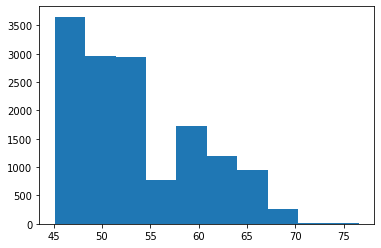

In [222]:
plt.hist(predictions)

In [216]:
from IPython.display import FileLink, FileLinks

FileLink('submission.csv')

/content/submission.csv